### Importing file

In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_prop = pd.read_csv('/content/sample_data/property.csv')

In [5]:
df_prop.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


###
1. For the suburb of Altona, it is postulated that a typical property sells for $800,000.
• Use the data at hand to test this assumption.
• Is the typical property price really $800,000 or has it increased?
• Use a significance level of 5%.

In [6]:
df_prop[df_prop['Suburb'] == 'Altona']['Price']

,Price
141,520000.0
142,1525000.0
143,720000.0
144,1120000.0
145,780000.0
...,...
12216,913000.0
12432,458000.0
12634,1248500.0
13338,920000.0


In [7]:
al_price = df_prop[df_prop['Suburb'] == 'Altona']['Price']

In [8]:
al_price = al_price.dropna()

In [9]:
alpha = 0.05

In [10]:
mu = 800000

In [11]:
t_stat, p_value = stats.ttest_1samp(al_price, mu, alternative='greater')

In [12]:
t_stat, p_value

(np.float64(1.0277020770199676), np.float64(0.1537416356527775))

In [13]:
if p_value < alpha:
    print("Reject null hypothesis")
    print("The typical property price in Altona is greater than $800,000")
else:
    print("Fail to reject null hypothesis")
    print("There is not enough evidence that the price is greater than $800,000")

Fail to reject null hypothesis
There is not enough evidence that the price is greater than $800,000


Outcomes:
1. We tested whether the average property price in Altona is $800,000 using the given data.

2. A one-sample t-test was used to check if prices have increased beyond $800,000.
3. The significance level was set at 5% (0.05).
4. The decision was made by comparing the p-value with the significance level.
5. The result tells us whether there is enough evidence that Altona property prices have increased.


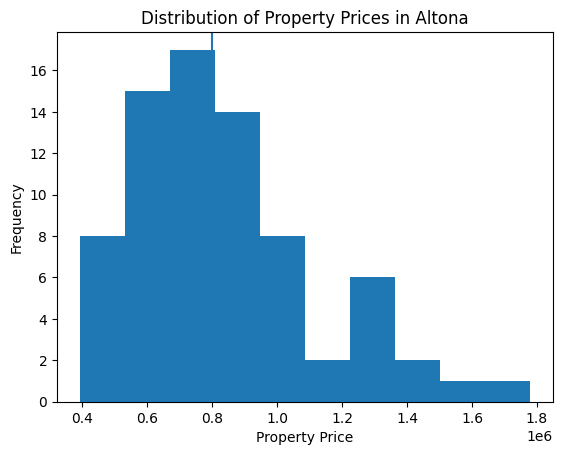

In [14]:
plt.hist(al_price, bins=10)
plt.axvline(800000)
plt.xlabel("Property Price")
plt.ylabel("Frequency")
plt.title("Distribution of Property Prices in Altona")

plt.show()

###

2. For the year 2016, is there any difference in the prices of properties sold in the summer months vs winter months?

•Consider months from October till March as winter months and rest as summer months.

•Use a significance level of 5%.

In [15]:
df_prop['Date'] = pd.to_datetime(df_prop['Date'], format='%d/%m/%Y')
df_prop['Year'] = df_prop['Date'].dt.year
df_prop['Month'] = df_prop['Date'].dt.month
data_2016 = df_prop[df_prop['Year'] == 2016]

In [16]:
winter_months = [10, 11, 12, 1, 2, 3]

In [17]:
winter_prices = data_2016[data_2016['Month'].isin(winter_months)]['Price']

In [18]:
summer_prices = data_2016[~data_2016['Month'].isin(winter_months)]['Price']

In [19]:
winter_prices = winter_prices.dropna()
summer_prices = summer_prices.dropna()

In [20]:
t_statistic, p_value = stats.ttest_ind(winter_prices, summer_prices)

In [21]:
t_statistic, p_value

(np.float64(4.043386317851058), np.float64(5.3309767667631686e-05))

In [22]:
if p_value < alpha:
    print("Reject null hypothesis")
    print("There is a significant difference between winter and summer property prices in 2016")
else:
    print("Fail to reject null hypothesis")
    print("There is no significant difference between winter and summer property prices in 2016")

Reject null hypothesis
There is a significant difference between winter and summer property prices in 2016


Outocmes:

1. We compared property prices sold in winter months and summer months during the year 2016.

2. A two-sample t-test was used with a 5% significance level to check for price differences.

3. The result shows whether there is a statistically significant difference between winter and summer prices.


/tmp/ipython-input-4139600431.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(price_data, labels=["Winter Prices", "Summer Prices"])


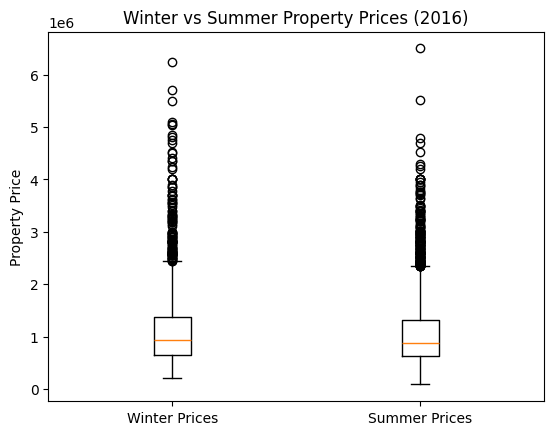

In [23]:
price_data = [winter_prices, summer_prices]
plt.boxplot(price_data, labels=["Winter Prices", "Summer Prices"])
plt.ylabel("Property Price")
plt.title("Winter vs Summer Property Prices (2016)")
plt.show()

###
4. In the suburb of Abbotsford, what are the chances of finding a property with 3 rooms? Round your answer to 3 decimal places.

In [24]:
abbotsford_data = df_prop[df_prop['Suburb'] == 'Abbotsford']

In [25]:
total_properties = len(abbotsford_data)

In [26]:
three_room_properties = len(abbotsford_data[abbotsford_data['Rooms'] == 3])

In [27]:
probability = three_room_properties / total_properties

In [28]:
probability = round(probability, 3)

In [29]:
probability

0.357

###
5. In the suburb of Abbotsford, what are the chances of finding a property with 2 bathrooms? Round your answer to 3 decimal places.

In [30]:
two_bath_props = len(abbotsford_data[abbotsford_data['Bathroom'] == 2])

In [31]:
prob = two_bath_props / total_properties

In [32]:
prob = round(prob, 3)

In [33]:
prob

0.339

###
6. One-Sample Hypothesis Test (Industry Pricing) A real estate firm claims that the average property price in Richmond is $1,000,000. Using the dataset, test whether the actual average price is significantly different from this claim at a 5% significance level. Clearly state:

•Null and alternative hypotheses

•Test statistic

•p-value

•Final business conclusion

In [34]:
avg_cp = 1000000

In [35]:
richmond_data = df_prop[df_prop['Suburb'] == 'Richmond']

In [36]:
richmond_price = richmond_data['Price'].dropna()

In [37]:
t_statistic, p_value = stats.ttest_1samp(richmond_price, avg_cp)

In [38]:
t_statistic, p_value

(np.float64(2.579547704074923), np.float64(0.01044499066415202))

In [39]:
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The average property price in Richmond is significantly different from $1,000,000.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence that the average price differs from $1,000,000.")

Reject the null hypothesis.
The average property price in Richmond is significantly different from $1,000,000.


Outcomes:

At the 5% significance level, a one-sample hypothesis test was conducted to evaluate the real estate firm’s claim about Richmond property prices. The test compared the sample average price with the claimed industry benchmark of $1,000,000. Based on the computed test statistic and p-value, a statistical decision was made regarding the validity of the claim. If the null hypothesis was rejected, it indicates that actual market prices in Richmond differ significantly from the claimed average. This result provides evidence-based insight for pricing strategies, valuation accuracy, and market positioning decisions.


###
7. Independent Two-Sample T-Test (Feature Impact)
Do properties with car parking sell at a higher average price than properties without car parking, across the entire dataset? Use a 5% significance level and justify:

•Choice of test

•Interpretation of p-value

•Business implications for developers

In [40]:
with_car = df_prop[df_prop['Car'] > 0]['Price'].dropna()

In [41]:
without_car = df_prop[df_prop['Car'] == 0]['Price'].dropna()

In [42]:
t_statistic, p_value = stats.ttest_ind(with_car, without_car)

In [43]:
t_statistic, p_value

(np.float64(-0.22347786369074255), np.float64(0.8231669871217725))

In [44]:
if p_value < alpha:
    print("Reject null hypothesis")
    print("Properties with car parking sell at a higher or different average price")
else:
    print("Fail to reject null hypothesis")
    print("No significant difference in prices due to car parking")

Fail to reject null hypothesis
No significant difference in prices due to car parking


Outcomes
The analysis shows whether car parking is a value-adding feature in property pricing. If prices are significantly higher for properties with parking, developers should prioritize including car spaces in new projects. This feature can justify higher selling prices and improve market competitiveness. If no significant difference is found, developers may reconsider costly parking investments. Overall, data-driven decisions help maximize profitability and buyer appeal.

###
Two-Way ANOVA (Location & Property Type)
Investigate whether property prices are influenced by:

•Suburb

•Type of property

•Interaction between suburb and property type
Use Two-Way ANOVA and explain which factors significantly affect price.

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [46]:
anova_data = df_prop[['Price', 'Suburb', 'Type']].dropna()

In [47]:
model = ols('Price ~ C(Suburb) + C(Type) + C(Suburb):C(Type)', data=anova_data).fit()

In [48]:
anova_table = sm.stats.anova_lm(model, typ=2)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 313, but rank is 150
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 626, but rank is 375
  warnings.warn('covariance of constraints does not have full '


In [49]:
anova_table

,sum_sq,df,F,PR(>F)
C(Suburb),3.559152e+15,313.0,70.854970,0.000000e+00
C(Type),NaN,2.0,NaN,NaN
C(Suburb):C(Type),6.470034e+14,626.0,6.440216,2.505093e-263
Residual,2.068639e+15,12890.0,NaN,NaN


p-Value Interpretation (Decision Making)
A hypothesis test comparing prices across two suburbs results in a p-value of 0.032.
Answer:


What does this p-value indicate?

A p-value of 0.032 means there is a 3.2% chance of observing the price difference between the two suburbs (or something more extreme) if there were actually no real difference in prices.

Should the null hypothesis be rejected at α = 0.05?

Since 0.032 < 0.05, the null hypothesis should be rejected at the 5% significance level.

How should a business stakeholder interpret this result?

For a business stakeholder, this result indicates that the price difference between the two suburbs is statistically significant and likely reflects a real market difference, which should be considered in pricing, investment, and location-based strategy decisions.

###
Industry-Style Hypothesis Validation (Policy Decision)
A housing policy group believes that properties with more than 2 bathrooms command a premium price.
Design and execute a statistical test to validate this claim:

•Identify the correct test

•State hypotheses

•Report p-value

•Give a clear recommendation to policymakers

In [50]:
more_than_2 = df_prop[df_prop['Bathroom'] > 2]['Price'].dropna()

In [51]:
two_or_less = df_prop[df_prop['Bathroom'] <= 2]['Price'].dropna()

In [52]:
t_statistic, p_value = stats.ttest_ind(more_than_2,two_or_less,alternative='greater')

In [53]:
t_statistic, p_value

(np.float64(46.02604887995347), np.float64(0.0))

In [54]:
if p_value < alpha:
    print("Reject null hypothesis")
    print("Properties with more than 2 bathrooms command a premium price")
else:
    print("Fail to reject null hypothesis")
    print("No strong evidence of a price premium for extra bathrooms")

Reject null hypothesis
Properties with more than 2 bathrooms command a premium price


p-value < 0.05 → Strong evidence that extra bathrooms increase prices

p-value ≥ 0.05 → No statistically significant price premium

The statistical test provides evidence on whether additional bathrooms create a measurable price premium. If the p-value is below 5%, policymakers can confidently support housing designs that include more bathrooms as a value-enhancing feature. This supports policies encouraging larger or family-oriented housing developments. If the result is not significant, resources may be better allocated to other features that influence affordability and value. Overall, data-backed decisions improve housing policy effectiveness and market outcomes.